In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline 
# sns.set(color_codes=True)
# import requests
import datetime
# import json
import time
# from pprint import pprint
# from pathlib import Path 


In [2]:
# df_merged = pd.read_csv('data/df_merged0.csv')
# Business = pd.read_csv('data/Business0.csv')
# Citybikes_datetime = pd.read_csv('data/Citybikes_datetime0.csv')
# Citybikes_users = pd.read_csv('data/Citybikes_users0.csv')
# POI_for_users = pd.read_csv('data/POI_for_users0.csv')
# Media = pd.read_csv('data/Media0.csv')
df = pd.read_csv('data/df0.csv')

print(df.shape)
print(df.dtypes)
df.head(5)

(2405, 14)
st_id              int64
slots              int64
empty              int64
available          int64
status             int64
Unique ID          int64
time_of_query      int64
cat_id           float64
distance           int64
popularity       float64
price            float64
open_now           int64
rating           float64
rating_count     float64
dtype: object


,st_id,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
0,1,35,16,19,1,1,17,13034.0,57,0.221702,1.0,1,8.0,55.0
1,1,35,16,19,1,1,17,13034.0,96,0.953849,2.0,1,8.2,111.0
2,1,35,16,19,1,1,17,11064.0,128,0.785993,0.0,0,8.3,12.0
3,1,35,16,19,1,1,17,11046.0,48,0.944987,0.0,1,7.2,8.0
4,1,35,16,19,1,1,17,13306.0,164,0.954043,2.0,0,8.7,367.0


In [3]:
df['open_now'].sum()
# At the time this data set was sampled, there were only about 20% of the nearby venues open
# df = df[df.open_now != False]
df.shape

(2405, 14)

In [4]:
df.count()

st_id            2405
slots            2405
empty            2405
available        2405
status           2405
Unique ID        2405
time_of_query    2405
cat_id           2405
distance         2405
popularity       2405
price            2405
open_now         2405
rating           2405
rating_count     2405
dtype: int64

In [5]:
df.groupby('st_id').sum().sort_values(['rating', 'distance'], ascending = False)

,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
st_id,,,,,,,,,,,,,
79,180,180,0,10,790,170,127099.0,1665,9.525252,15.0,2,86.7,1457.0
5,260,80,180,10,50,170,128542.0,1953,9.371446,10.0,5,85.7,3094.0
138,180,140,40,10,1380,170,127341.0,1601,9.506131,18.0,1,85.7,1463.0
201,180,20,160,10,2010,170,131765.0,1417,9.709741,14.0,5,85.7,2079.0
314,160,70,90,10,3140,170,142261.0,2867,9.385199,10.0,3,85.5,2506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,160,10,150,10,2190,170,142481.0,2920,7.537961,6.0,2,38.9,336.0
100,198,108,90,9,900,153,135682.0,1732,6.909018,5.0,1,38.3,279.0
102,160,140,20,10,1020,170,164349.0,1530,8.072774,0.0,1,26.0,181.0


In [6]:
# df = df[df.open_now != False]
df.shape

(2405, 14)

In [7]:
df.head()

,st_id,slots,empty,available,status,Unique ID,time_of_query,cat_id,distance,popularity,price,open_now,rating,rating_count
0,1,35,16,19,1,1,17,13034.0,57,0.221702,1.0,1,8.0,55.0
1,1,35,16,19,1,1,17,13034.0,96,0.953849,2.0,1,8.2,111.0
2,1,35,16,19,1,1,17,11064.0,128,0.785993,0.0,0,8.3,12.0
3,1,35,16,19,1,1,17,11046.0,48,0.944987,0.0,1,7.2,8.0
4,1,35,16,19,1,1,17,13306.0,164,0.954043,2.0,0,8.7,367.0


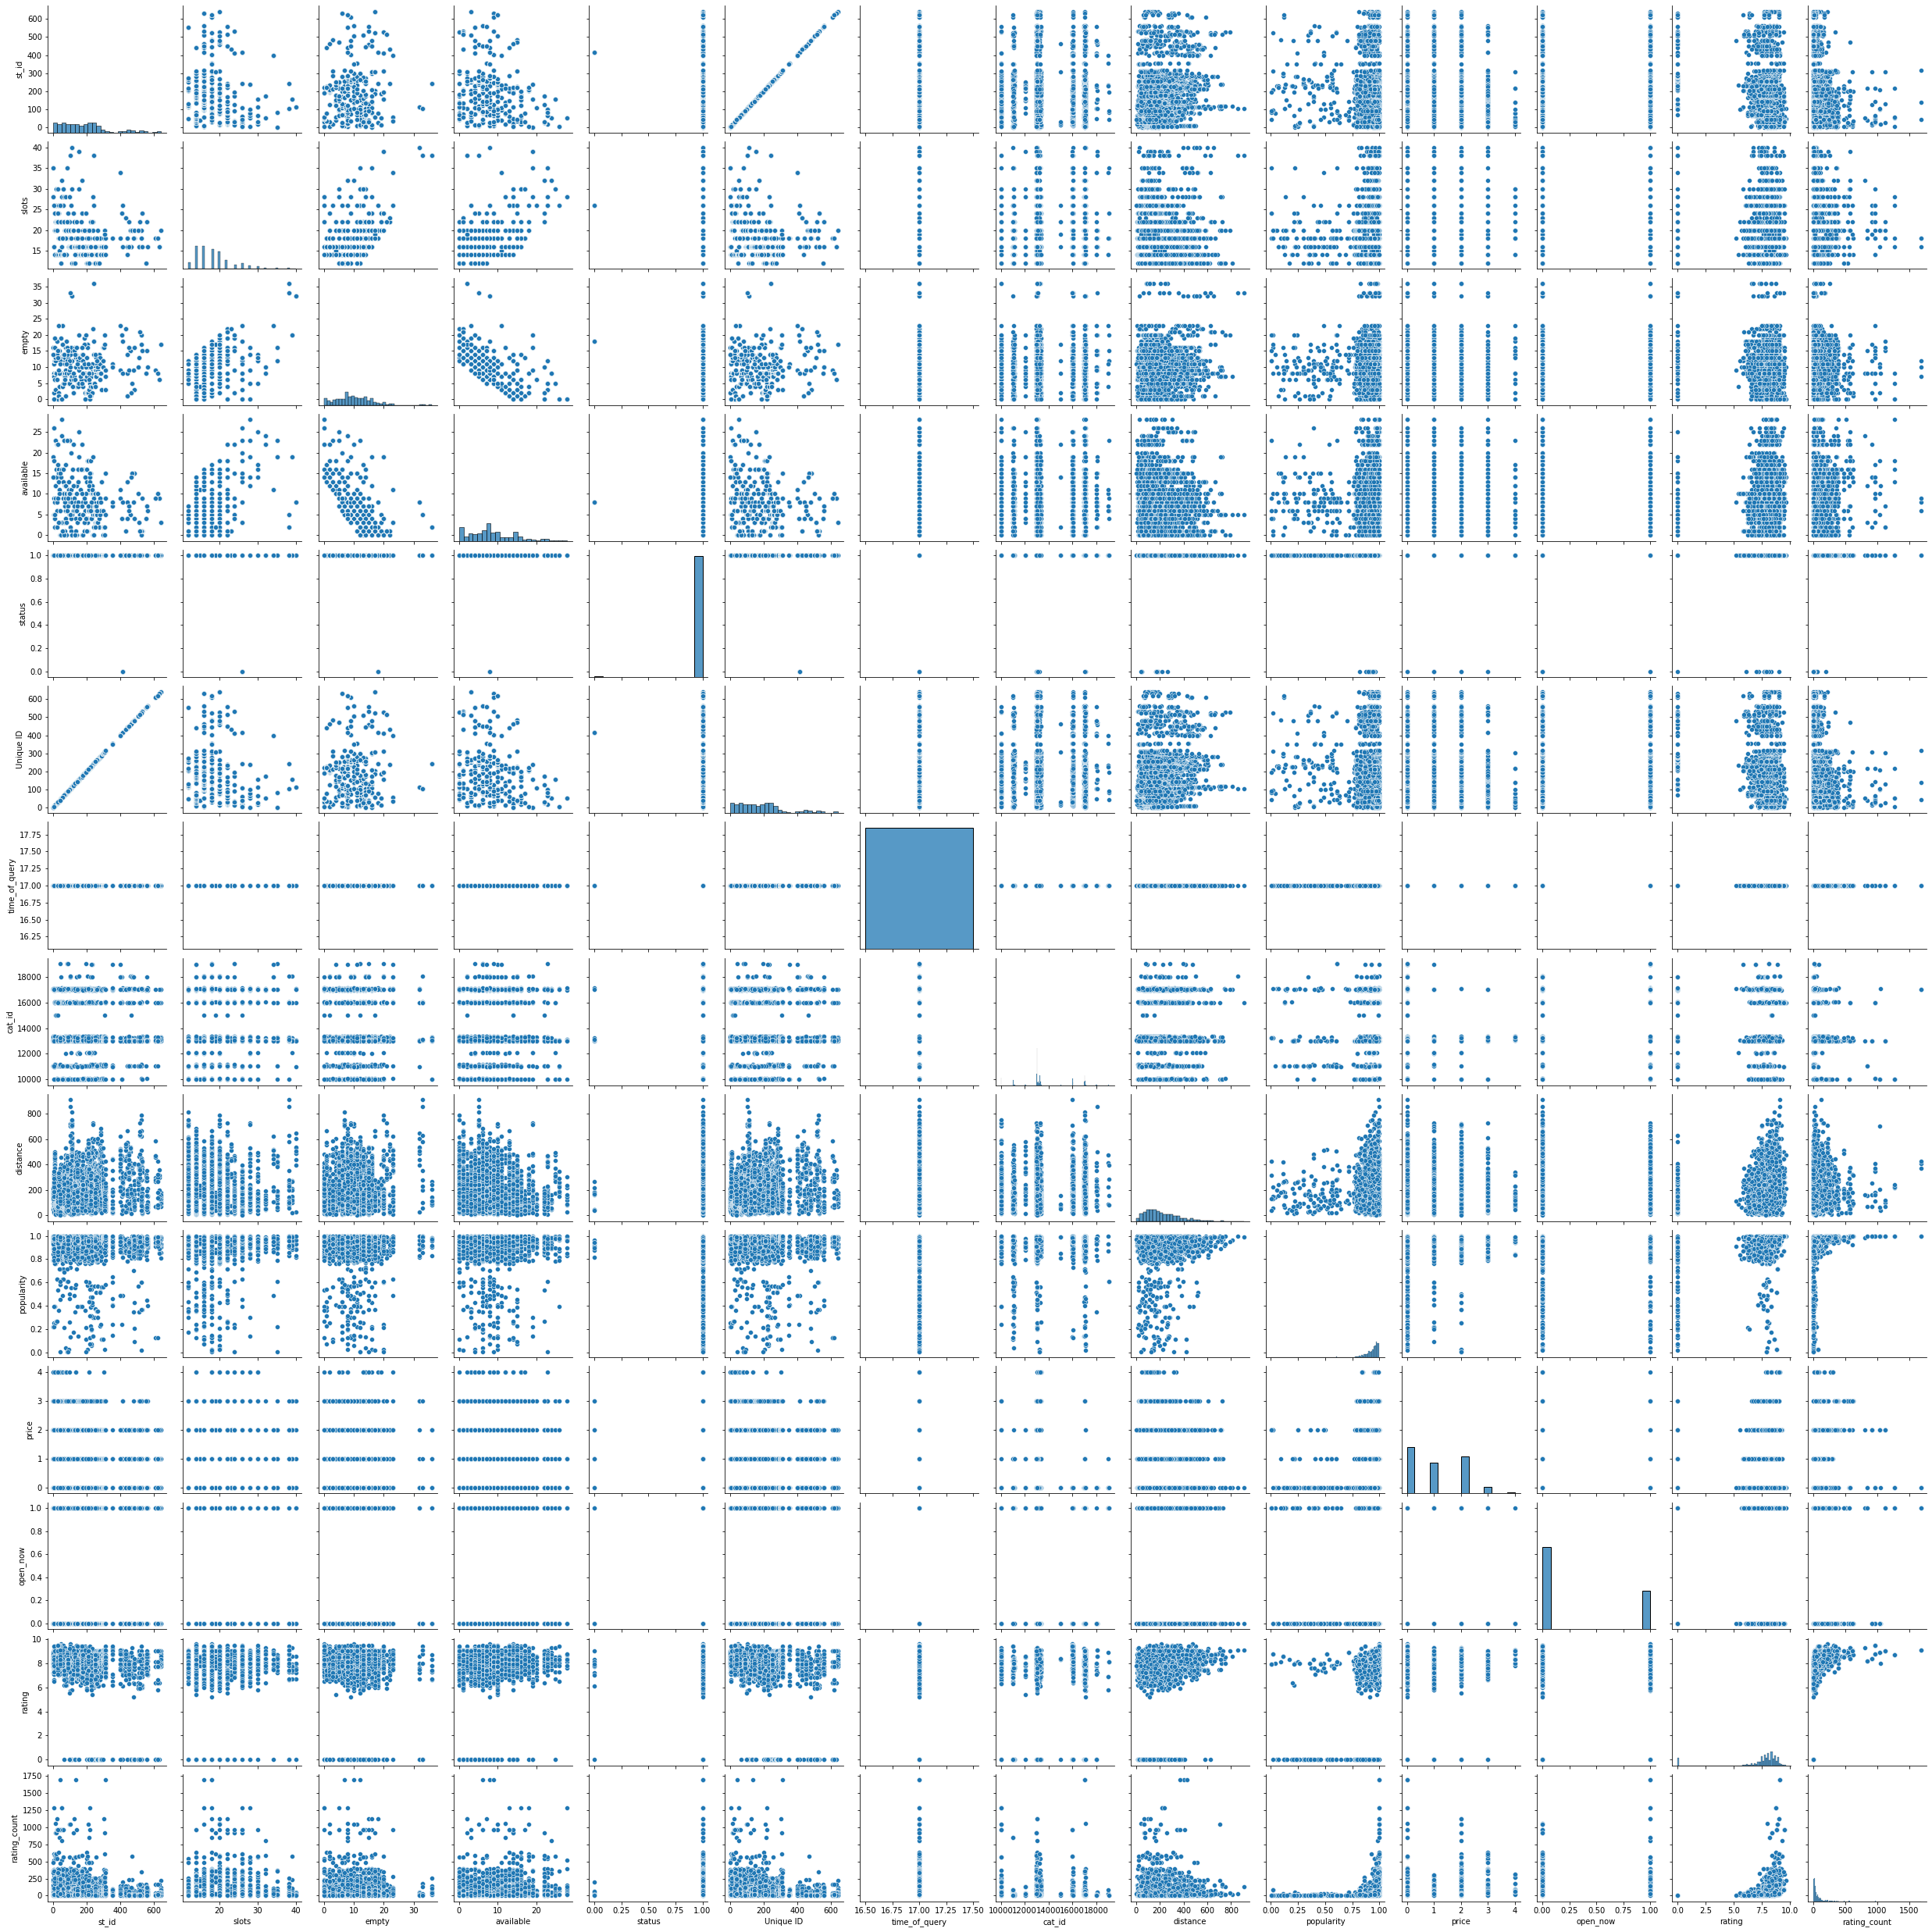

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df)
plt.show()

In [12]:
# Remove unhelpful columns:
df = df.drop(['status', 'time_of_query', 'open_now', 'Unique ID'], axis=1)
df.head(3)

,st_id,slots,empty,available,cat_id,distance,popularity,price,rating,rating_count
0,1,35,16,19,13034.0,57,0.221702,1.0,8.0,55.0
1,1,35,16,19,13034.0,96,0.953849,2.0,8.2,111.0
2,1,35,16,19,11064.0,128,0.785993,0.0,8.3,12.0


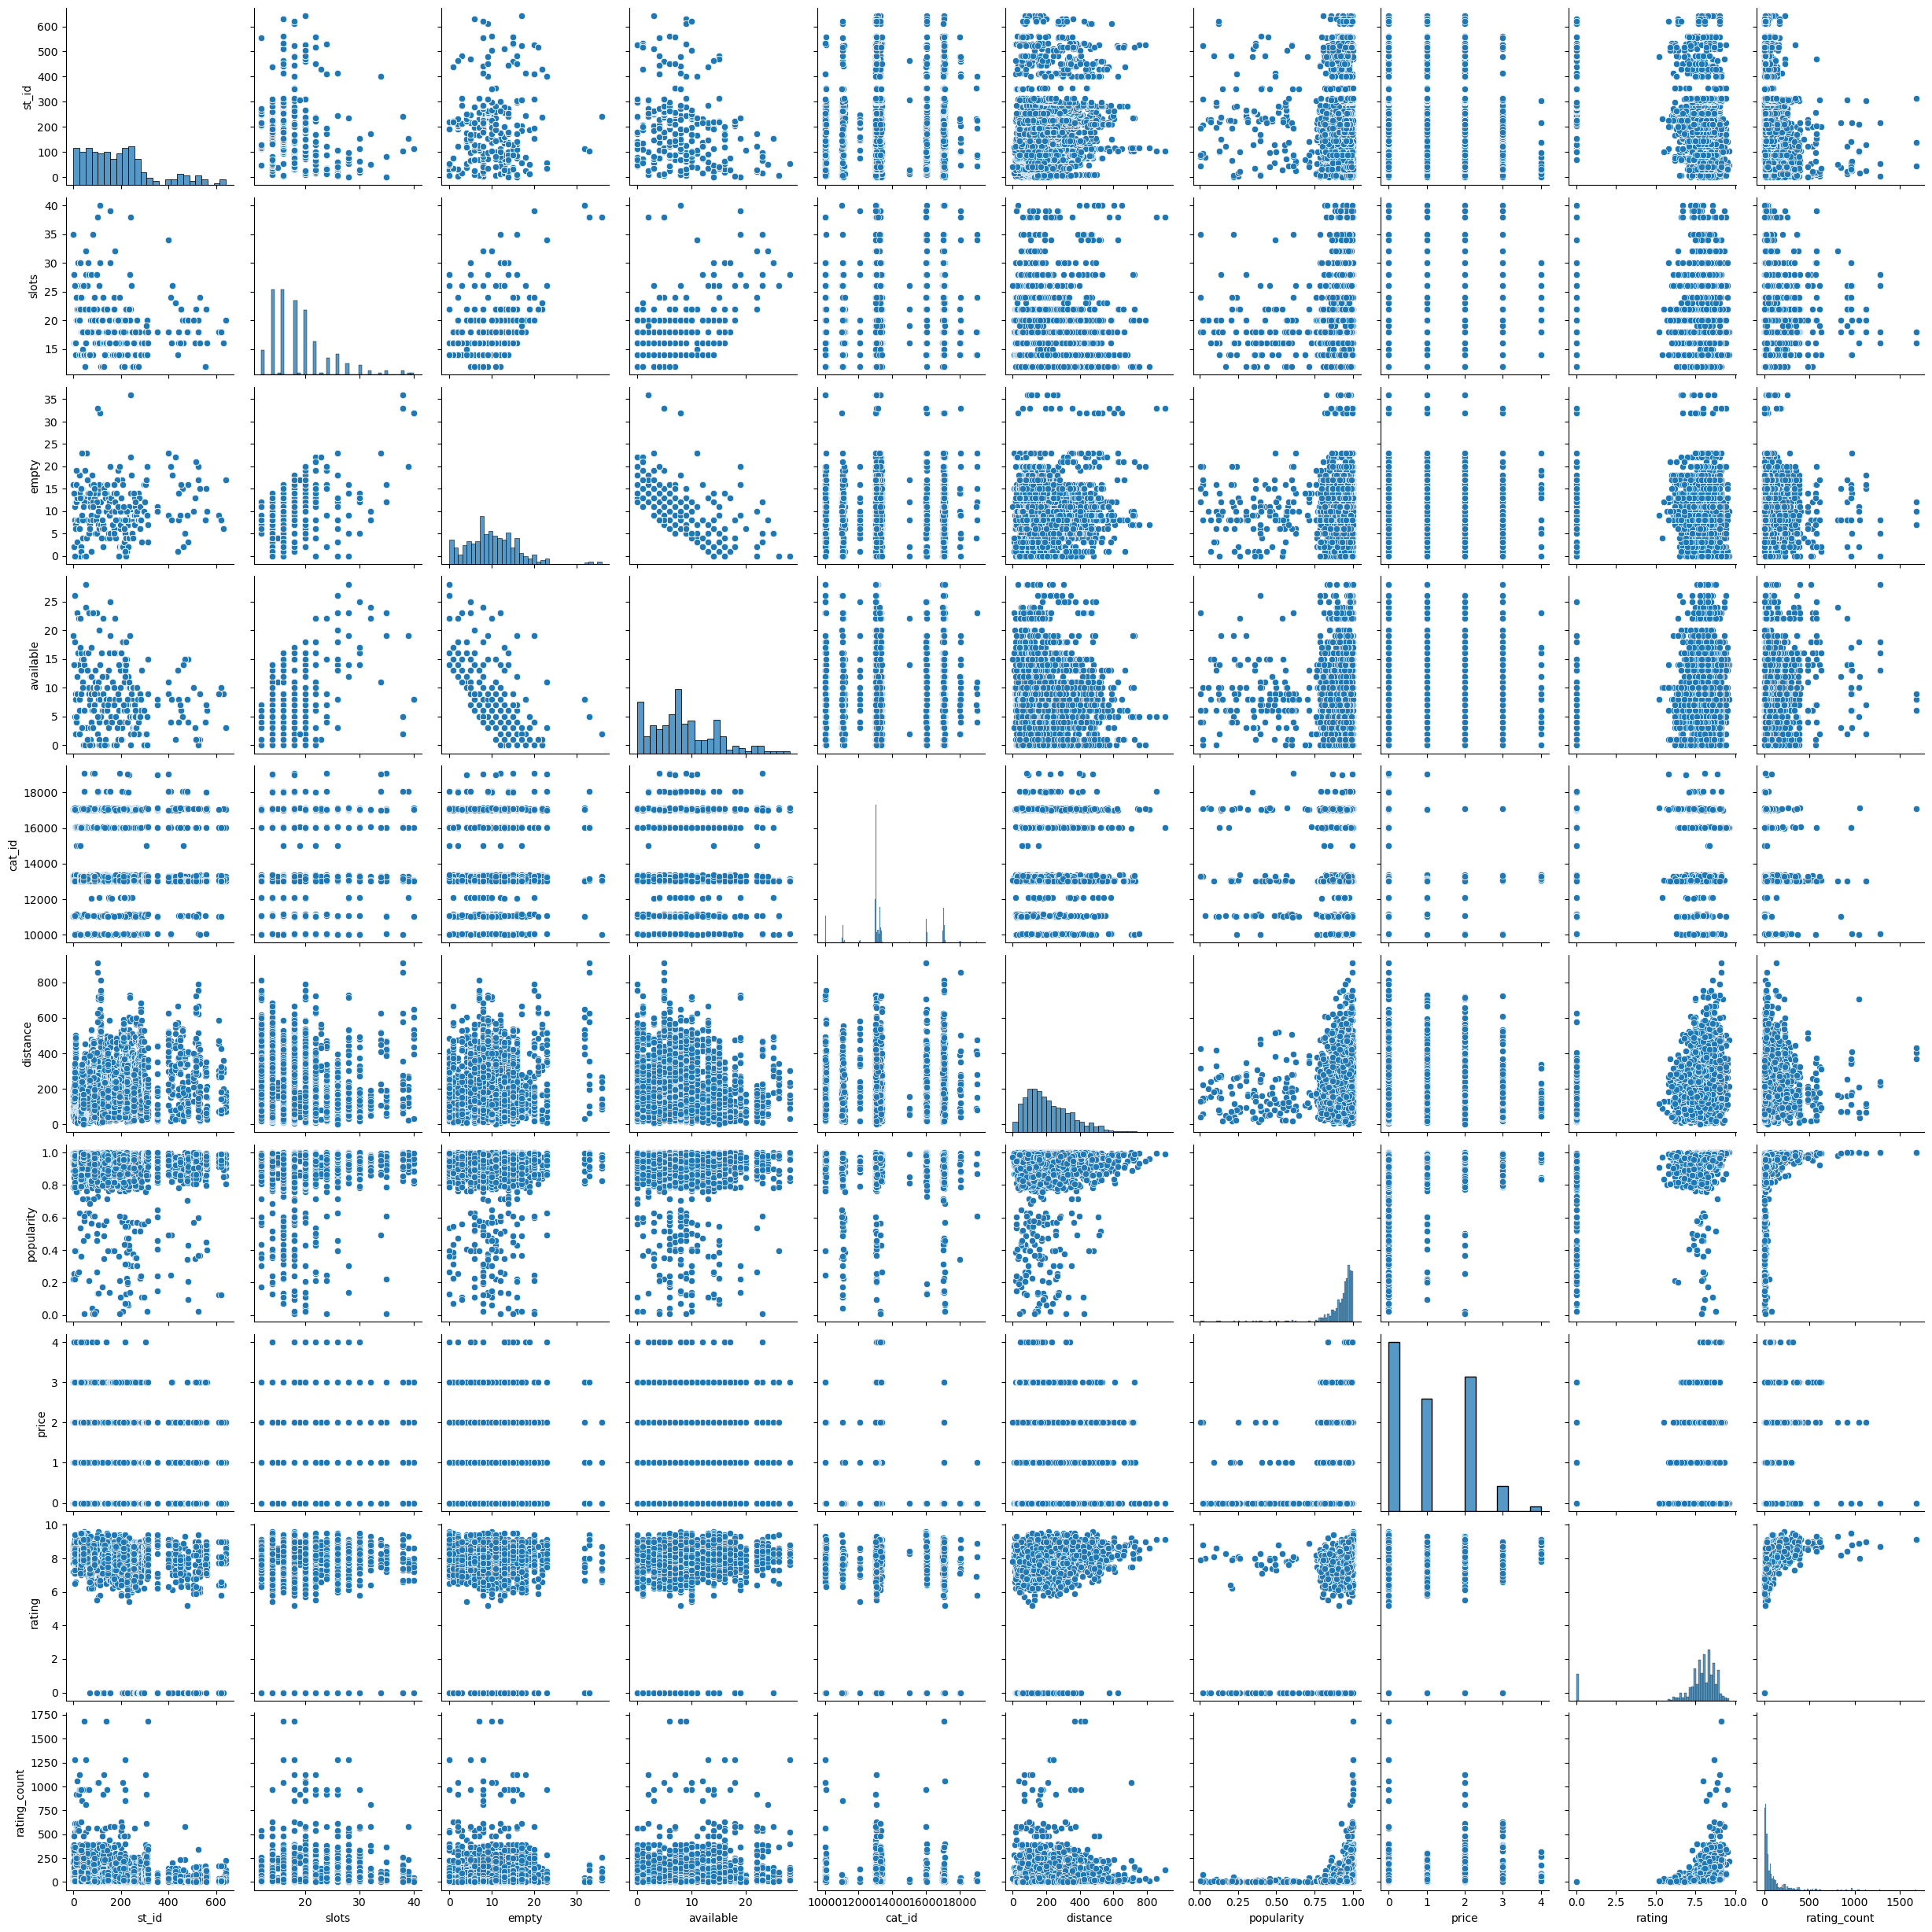

In [13]:
sns.pairplot(data=df)
plt.show()

Build a regression model.

In [14]:
df.corr()

,st_id,slots,empty,available,cat_id,distance,popularity,price,rating,rating_count
st_id,1.000000,-0.164883,0.085374,-0.232029,0.019640,0.155233,-0.075110,-0.073498,-0.239916,-0.174599
slots,-0.164883,1.000000,0.432809,0.475117,0.032262,-0.113026,0.033542,-0.023791,0.010107,0.093486
empty,0.085374,0.432809,1.000000,-0.585093,0.024199,0.019197,0.025528,-0.031208,-0.046281,-0.028252
available,-0.232029,0.475117,-0.585093,1.000000,0.006380,-0.119033,0.005330,0.009514,0.055570,0.113851
cat_id,0.019640,0.032262,0.024199,0.006380,1.000000,0.020786,0.049453,-0.331449,-0.062179,-0.090311
distance,0.155233,-0.113026,0.019197,-0.119033,0.020786,1.000000,0.088461,-0.013699,0.153552,-0.005607
popularity,-0.075110,0.033542,0.025528,0.005330,0.049453,0.088461,1.000000,0.149386,0.432402,0.222826
price,-0.073498,-0.023791,-0.031208,0.009514,-0.331449,-0.013699,0.149386,1.000000,0.233067,0.199643
rating,-0.239916,0.010107,-0.046281,0.055570,-0.062179,0.153552,0.432402,0.233067,1.000000,0.259082
rating_count,-0.174599,0.093486,-0.028252,0.113851,-0.090311,-0.005607,0.222826,0.199643,0.259082,1.000000


In [ ]:
# Removing the id columns since they're showing weak correlations, but there shouldn't be any

df = df.drop(['st_id', 'cat_id'], axis=1)
df.head(3)

In [ ]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['available'], df['slots'])
stat, p2 = scipy.stats.pearsonr(df['available'], df['empty'])
stat, p3 = scipy.stats.pearsonr(df['available'], df['prestige'])
print(p1, p2, p3)

In [ ]:
# # Save tables to data file

# # Move these to top of doc so they're only run once, in order to activate sequential save values/files
# save_num_df_merged = 0
# save_num_df_fsq = 0
# save_num_df_yelp = 0
# save_num_df_ctybks = 0
# save_num_Business = 0
# save_num_Citybikes_datetime = 0
# save_num_Citybikes_users = 0
# save_num_Media = 0
# save_num_POI_for_users = 0

# df_merged.to_csv(f'data/df_merged{save_num_df_merged}.csv', index=False)
# save_num_df_merged += 1

# df_fsq.to_csv(f'data/df_fsq{save_num_df_fsq}.csv', index=False)
# save_num_df_fsq += 1

# df_yelp.to_csv(f'data/df_yelp{save_num_df_yelp}.csv', index=False)
# save_num_df_yelp += 1

# df_ctybks.to_csv(f'data/df_ctybks{save_num_df_ctybks}.csv', index=False)
# save_num_df_ctybks += 1

# Business.to_csv(f'data/Business{save_num_Business}.csv', index=False)
# save_num_Business += 1

# Citybikes_datetime.to_csv(f'data/Citybikes_datetime{save_num_Citybikes_datetime}.csv', index=False)
# save_num_Citybikes_datetime += 1

# Citybikes_users.to_csv(f'data/Citybikes_users{save_num_Citybikes_users}.csv', index=False)
# save_num_Citybikes_users += 1

# Media.to_csv(f'data/Media{save_num_Media}.csv', index=False)
# save_num_Media += 1

# POI_for_users.to_csv(f'data/POI_for_users{save_num_POI_for_users}.csv', index=False)
# save_num_POI_for_users += 1

Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?